In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Going to check for any null values

In [5]:
df.isna().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

### 5 columns have null values, going to analyze each of them

In [6]:
#df.location.value_counts()
for col in df.columns:
    print(f"Column {col} has {df[col].isna().sum()} null values")

    #df.location.isna().sum()


Column area_type has 0 null values
Column availability has 0 null values
Column location has 1 null values
Column size has 16 null values
Column society has 5502 null values
Column total_sqft has 0 null values
Column bath has 73 null values
Column balcony has 609 null values
Column price has 0 null values


In [7]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df['bath'].head()
#df['society'].value_counts()

0    2.0
1    5.0
2    2.0
3    3.0
4    2.0
Name: bath, dtype: float64

### location has 1 null, that can be dropped
### size has 16 null, that can be dropped
### for bath we will subsiture mean value
### for balcony we will substitue with 0

In [9]:
df.dropna(subset= ['location','size'],inplace=True)

In [10]:
mean_bath = df['bath'].mean()
df['bath'].fillna(int(mean_bath),inplace=True)

In [11]:
df['balcony'].fillna(0,inplace=True)

In [12]:
df.drop(['availability','society'],axis=1,inplace=True)

In [13]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [14]:
print("2 BHK".split(' '))

['2', 'BHK']


### Creating new column based on size to have int values instead of two separate values like 2 BHK, 4 bedroom etc

In [15]:
df['bhk']= df['size'].apply(lambda x: int(x.split(' ')[0]))

In [16]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### total sq ft has range of values in some row, going to convert such rows to avg value of the range

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


### checking all values with range/
### here ~ is used to find negation of applied function.
### that is pick rows where applied condition returns false

In [18]:
 df.loc[~df['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,2.0,0.0,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,2.0,0.0,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Devanahalli,1 BHK,1020 - 1130,2.0,0.0,52.570,1
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [19]:
def avg_range(x):
    try:
        x1 = x.split('-')
        if len(x1) == 2:
            avg = float(x1[0]) + float(x1[1])/2
        else:
            avg = float(x) # if plain number, just convert it to float
    except:
        return None
    return avg


In [20]:
df2 = df.copy()

In [21]:
df2['total_sqft']=df2['total_sqft'].apply(avg_range)

### Drop the rows which have null values as a result of the above operation

In [22]:
df2.dropna(inplace=True)

### Next we will analyze the location column

In [23]:
len(df2.location.unique())

1298

### There are 1298 unique locations.
### Will set a threshold as 10 and convert all locations with less than 10 properties as "Other"

In [24]:
df2.location = df2.location.apply(lambda x:  x.strip())
df2.groupby('location')['location'].count().sort_values(ascending=False)
#df2.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [25]:
df3 = df2.copy()


In [26]:
location_stats = df3['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [27]:
location_stats.values.sum()

13257

In [28]:
len(location_stats[location_stats>10])


240

In [29]:
len(location_stats)


1287

In [30]:
len(location_stats[location_stats<=10])
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [31]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

241

In [32]:
df3.loc[df3['location']=='other'].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
9,Plot Area,other,6 Bedroom,1020.0,6.0,0.0,370.0,6
18,Super built-up Area,other,3 BHK,2770.0,4.0,2.0,290.0,3
19,Super built-up Area,other,2 BHK,1100.0,2.0,2.0,48.0,2
25,Super built-up Area,other,3 BHK,1250.0,3.0,2.0,56.0,3
42,Super built-up Area,other,1 BHK,600.0,1.0,0.0,38.0,1


### Create new feature price per sq ft

In [33]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']

In [34]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


### Outlier detection and Removal
#### There should be some minimum number of rooms per sqft area for data be logically correct, i.e, there cant be 6 rooms in 1200 sqft. For this we shall keep threshold of 300 sqft per room and check for outliers

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13257 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13257 non-null  object 
 1   location        13257 non-null  object 
 2   size            13257 non-null  object 
 3   total_sqft      13257 non-null  float64
 4   bath            13257 non-null  float64
 5   balcony         13257 non-null  float64
 6   price           13257 non-null  float64
 7   bhk             13257 non-null  int64  
 8   price_per_sqft  13257 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.0+ MB


In [36]:
df3[df3.total_sqft/df3.bhk<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,0.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,0.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [37]:
df3.shape

(13257, 9)

In [38]:
df4 = df3[(df3.total_sqft/df3.bhk >= 300)]
df4.shape

(12513, 9)

### next lets check for outliers using standard deviation of price per sq ft

In [39]:
df4.price_per_sqft.describe()

count     12513.000000
mean       6282.070788
std        4169.463545
min         267.829813
25%        4181.818182
50%        5274.725275
75%        6896.551724
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [40]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(10269, 9)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

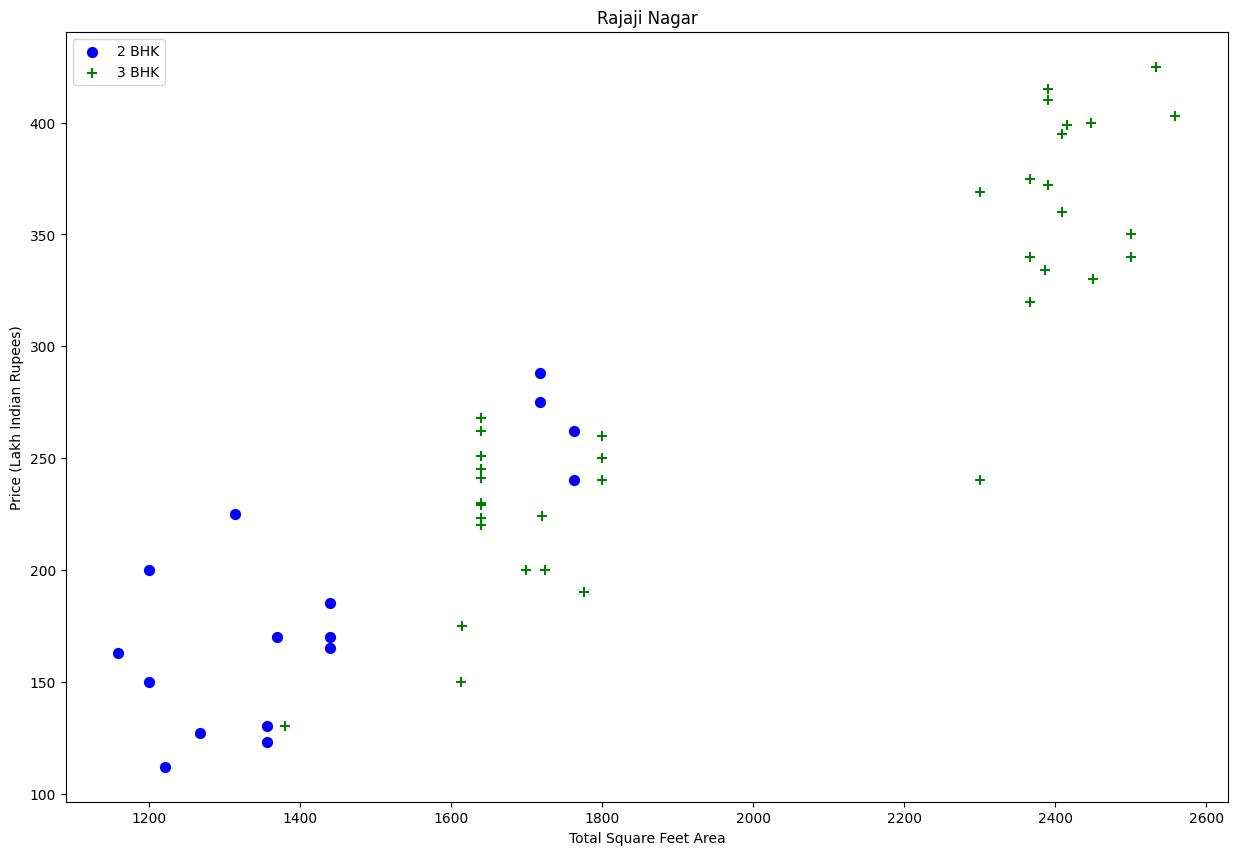

In [41]:
import matplotlib.pyplot as plt
import matplotlib

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e. 
#### {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
 }

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(7326, 9)

### Outlier Removal Using Bathrooms Feature


Text(0, 0.5, 'Count')

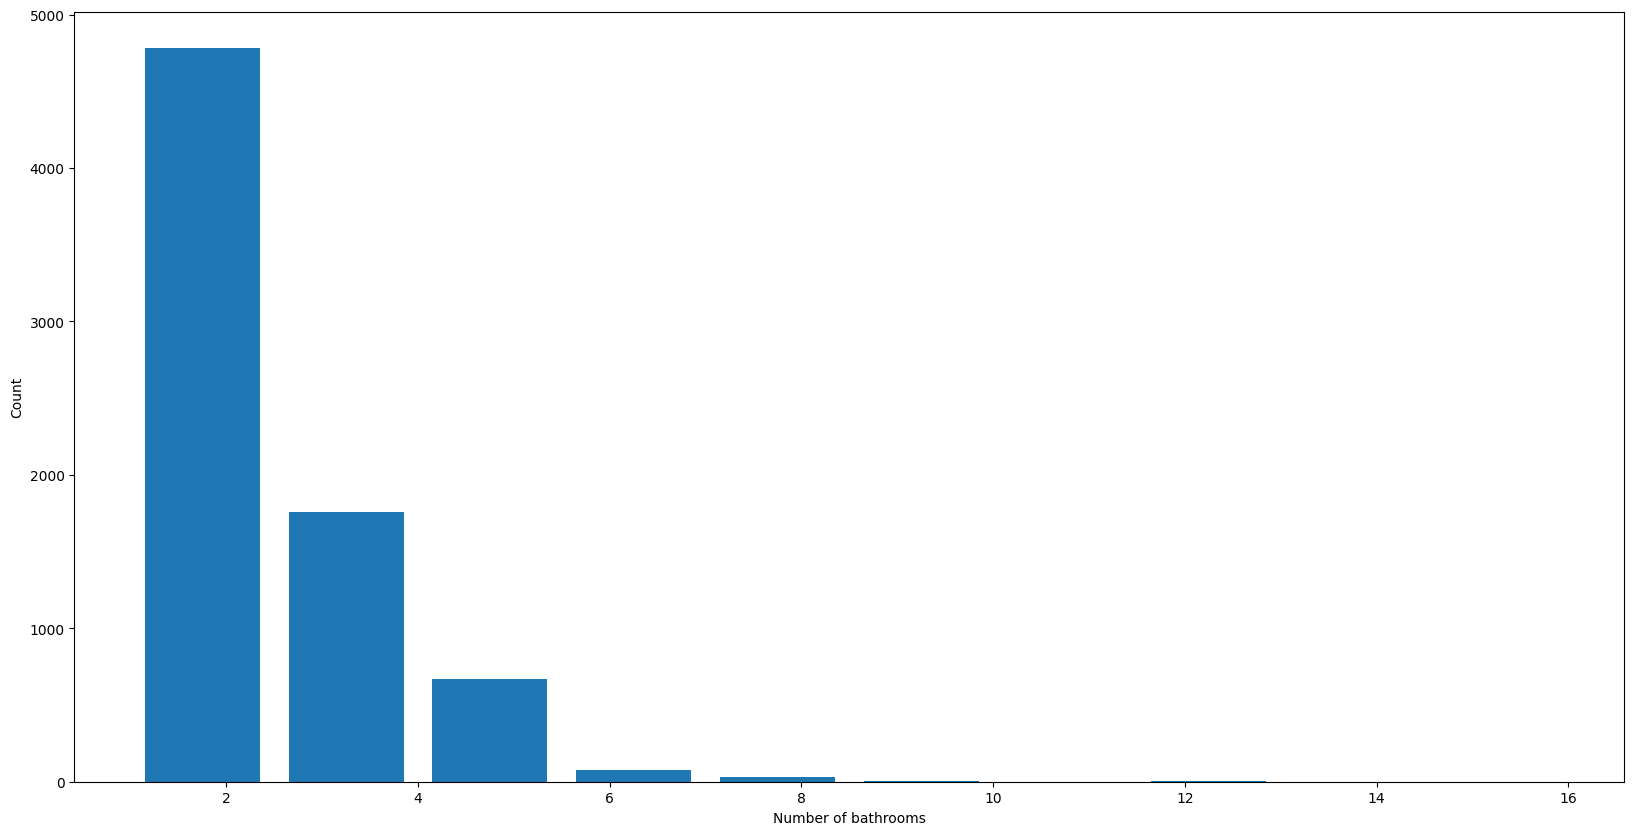

In [43]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [44]:
df6[df6.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5299,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,0.0,160.0,10,4000.000000
8509,Super built-up Area,other,10 BHK,12000.0,12.0,0.0,525.0,10,4375.000000
8598,Super built-up Area,other,16 BHK,10000.0,16.0,0.0,550.0,16,5500.000000
9332,Super built-up Area,other,11 BHK,6000.0,12.0,0.0,150.0,11,2500.000000
9663,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [45]:
df6[df6.bath>df6.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1629,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5260,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,0.0,450.0,4,6428.571429
6739,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8434,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [46]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape


(7252, 9)

In [47]:
df8 = df7.drop(['size','price_per_sqft','area_type'],axis=1)
df8.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


### Going to scale numeric columns

In [78]:
housing_num = df8.drop(['location','price'], axis=1)
num_attribs = list(housing_num)
num_attribs

['total_sqft', 'bath', 'balcony', 'bhk']

In [64]:
# from sklearn import preprocessing
# std_scaler = preprocessing.StandardScaler()
# housing_num[num_attribs] = std_scaler.fit_transform(housing_num[num_attribs])

# housing_num.head(10)

,total_sqft,bath,balcony,bhk
0,1.670057,1.705265,-0.628242,1.674380
1,0.188852,0.632150,0.599132,0.570105
2,0.486307,-0.440966,1.826505,0.570105
3,-0.333213,-0.440966,-1.855615,0.570105
4,-0.290719,-0.440966,0.599132,-0.534169
5,1.548647,1.705265,-1.855615,1.674380
6,1.184416,1.705265,0.599132,1.674380
8,0.486307,0.632150,-0.628242,0.570105
9,0.031018,2.778380,-1.855615,2.778654
10,0.716986,1.705265,-0.628242,0.570105


### Going to do OHE on categorical variables

In [79]:
dummies = pd.get_dummies(df8.location).astype(int)

dummies.drop(['other'],axis = 1,inplace=True)
dummies.shape

(7252, 240)

In [80]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#df9 = pd.concat([dummies, df8],axis = 1 )
df9 = pd.concat([housing_num,dummies ],axis = 1 )

In [82]:
#df9.drop(['location'],axis=1,inplace=True)
df9.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#X = df9.drop(['price'],axis=1)
X = df9
Y= df8.price
print (X.shape)
print(Y.shape)

(7252, 244)
(7252,)


In [85]:
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Building basic model first

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.852182924940351

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'SVR': {
            'model': svm.SVR(),
            'params': {
                'kernel' : ['linear', 'rbf'],
                'C': [0.1,1]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.818102,{'positive': False}
1,SVR,0.712978,"{'C': 1, 'kernel': 'linear'}"
2,decision_tree,0.696402,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [59]:
from skopt import BayesSearchCV

def find_best_model_using_Bayessearch(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'SVR': {
            'model': svm.SVR(),
            'params': {
                'kernel' : ['linear', 'rbf'],
                'C': [0.1,1]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    #cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        bs =  BayesSearchCV(estimator=config['model'], search_spaces=config['params'], cv=5, n_iter=10)
        bs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': bs.best_score_,
            'best_params': bs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_Bayessearch(X,Y)


KeyboardInterrupt



In [89]:
def predict_price(location,sqft,bath,balcony,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [92]:
predict_price('1st Phase JP Nagar',1200, 2,1, 3)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


111.27892552029233

In [94]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [95]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))